# 01. Linear Regression

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('LinearRegressionData.csv')
dataset.head()

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22


In [3]:
X = dataset.iloc[:, :-1].values # independent variable

In [4]:
Y = dataset.iloc[:, -1].values # dependent variable

In [5]:
X, Y

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100]))

In [6]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X, Y) # Creating a model

LinearRegression()

In [7]:
y_pred = reg.predict(X)
y_pred

array([  5.00336377,  12.31395163,  18.58016979,  24.84638795,
        26.93512734,  33.20134551,  40.51193337,  45.73378184,
        46.77815153,  52.        ,  55.13310908,  60.35495755,
        62.44369694,  63.48806663,  64.53243633,  71.84302419,
        74.97613327,  87.5085696 ,  89.59730899, 104.2184847 ])

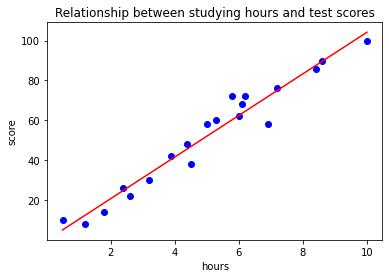

In [8]:
plt.scatter(X, Y, color='blue')
plt.plot(X, y_pred, color='red')
plt.title('Relationship between studying hours and test scores')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [9]:
print('What is the test score if you study 9 hours: ', reg.predict([[9]]))

What is the test score if you study 9 hours:  [93.77478776]


In [10]:
print('What are the test scores if you study 6, 7, and 8 hours: ', reg.predict([[6], [7], [8]]))

What are the test scores if you study 6, 7, and 8 hours:  [62.44369694 72.88739388 83.33109082]


In [11]:
a = reg.coef_ # Slope

In [12]:
b = reg.intercept_ # y-intercept

In [13]:
y = (a * 9) + b # Predicted value if a student studies 9 hours
y

array([93.77478776])

### Data Set Separation

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

In [15]:
dataset = pd.read_csv('LinearRegressionData.csv')
dataset

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22
5,3.2,30
6,3.9,42
7,4.4,48
8,4.5,38
9,5.0,58


In [16]:
X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, -1].values

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0) 
# Training set 80%
# Test set 20%

In [18]:
X, len(X)

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 20)

In [19]:
X_train, len(X_train) # # of training set

(array([[5.3],
        [8.4],
        [3.9],
        [6.1],
        [2.6],
        [1.8],
        [3.2],
        [6.2],
        [5. ],
        [4.4],
        [7.2],
        [5.8],
        [2.4],
        [0.5],
        [6.9],
        [6. ]]),
 16)

In [20]:
X_test, len(X_test) # # of test set

(array([[ 8.6],
        [ 1.2],
        [10. ],
        [ 4.5]]),
 4)

In [21]:
Y, len(Y)

(array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100]),
 20)

In [22]:
Y_train, len(Y_train)

(array([60, 86, 42, 68, 22, 14, 30, 72, 58, 48, 76, 72, 26, 10, 58, 62]), 16)

In [23]:
Y_test, len(Y_test)

(array([ 90,   8, 100,  38]), 4)

### Modeling

In [24]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [25]:
reg.fit(X_train, Y_train)

LinearRegression()

### Visualization (training set)

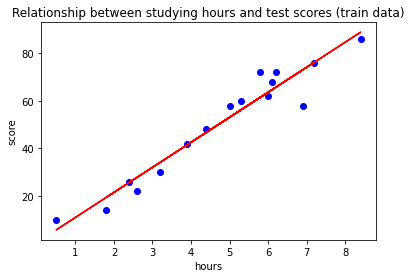

In [26]:
plt.scatter(X_train, Y_train, color='blue')
plt.plot(X_train, reg.predict(X_train), color='red')
plt.title('Relationship between studying hours and test scores (train data)')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

### Visualization (test set)

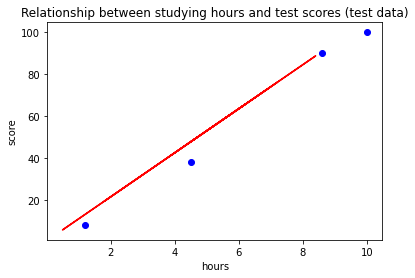

In [27]:
plt.scatter(X_test, Y_test, color='blue')
plt.plot(X_train, reg.predict(X_train), color='red')
plt.title('Relationship between studying hours and test scores (test data)')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [28]:
m = reg.coef_
m

array([10.49161294])

In [29]:
c = reg.intercept_
c

0.6115562905169796

### Evaluation

In [30]:
reg.score(X_test, Y_test) # evaluating test set

0.9727616474310156

In [31]:
reg.score(X_train, Y_train) # evaluating training set

0.9356663661221668